In [24]:
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
from matplotlib.patches import FancyBboxPatch

from src.wimbd_ import Colors


from itertools import combinations

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 2)
pd.set_option('display.max_rows', 500)

PYTHIA_MODELS = Colors.PYTHIA_MODEL_NAMES
model_colormap = plt.cm.get_cmap('coolwarm', len(PYTHIA_MODELS))
# model_color_mapping = {model: model_colormap(1 - i / len(PYTHIA_MODELS)) for i, model in enumerate(reversed(PYTHIA_MODELS))}
model_color_mapping = {model: model_colormap(i) for i, model in enumerate(reversed(PYTHIA_MODELS))}
cool_grey = (0.55, 0.57, 0.67)
model_color_mapping['pythia-410m'] = cool_grey

/tmp/ipykernel_2356023/339483659.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  model_colormap = plt.cm.get_cmap('coolwarm', len(PYTHIA_MODELS))


In [23]:
model_color_mapping

{'pythia-12b': (0.2298057, 0.298717966, 0.753683153, 1.0),
 'pythia-6.9b': (0.38301334, 0.50941904, 0.917387822, 1.0),
 'pythia-2.8b': (0.552953156, 0.688929332, 0.995375608, 1.0),
 'pythia-1.4b': (0.722193294, 0.813952739, 0.976574709, 1.0),
 'pythia-410m': (0.865395197, 0.86541021, 0.865395561, 1.0),
 'pythia-160m': (0.958852946, 0.769767752, 0.678007945, 1.0),
 'pythia-70m': (0.958003065, 0.602842431, 0.481775914, 1.0),
 'pythia-31m': (0.869186849, 0.378313092, 0.300267182, 1.0),
 'pythia-14m': (0.705673158, 0.01555616, 0.150232812, 1.0)}

In [2]:
# pth_dict = {
#     4: {
#         "pythia-410m": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/410m/pythia-410m/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/4/examples_dfs_0-shot_common_pythia_models.pkl",
#         "pythia-12b": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/exp_3/test-set/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/4/examples_dfs_0-shot_common_pythia_models.pkl"
#     },

#     2: {
#         "pythia-410m": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/exp_3/test-set/pythia-410m/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/2/examples_dfs_0-shot_common_pythia_models.pkl",
#         "pythia-12b": "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/wmt09_gens/pile/exp_3/test-set/pythia-12b/n_samples_None_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaFalse/2/examples_dfs_0-shot_common_pythia_models.pkl",
#     }
# }

pth_dict = {
    1: {
        "pythia-410m": "./results/n-grams/wmt09_gens/pile/exp4__/pythia-410m/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/1/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-2.8b": "./results/n-grams/wmt09_gens/pile/exp4__/pythia-2.8b/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/1/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-12b": "./results/n-grams/wmt09_gens/pile/exp4__/pythia-12b/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/1/examples_dfs_0-shot_common_pythia_models.pkl",
    },

    2: {
        "pythia-410m": "./results/n-grams/wmt09_gens/pile/exp4__/pythia-410m/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-2.8b": "./results/n-grams/wmt09_gens/pile/exp4__/pythia-2.8b/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-12b": "./results/n-grams/wmt09_gens/pile/exp4__/pythia-12b/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/examples_dfs_0-shot_common_pythia_models.pkl",
    },

    3: {
        "pythia-410m": "./results/n-grams/wmt09_gens/pile/exp4__/pythia-410m/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/3/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-2.8b": "./results/n-grams/wmt09_gens/pile/exp4__/pythia-2.8b/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/3/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-12b": "./results/n-grams/wmt09_gens/pile/exp4__/pythia-12b/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/3/examples_dfs_0-shot_common_pythia_models.pkl",
    },

    4: {
        "pythia-410m": "./results/n-grams/wmt09_gens/pile/exp4_/pythia-410m/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/4/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-2.8b": "./results/n-grams/wmt09_gens/pile/exp4_/pythia-2.8b/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/4/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-12b": "./results/n-grams/wmt09_gens/pile/exp4_/pythia-12b/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/4/examples_dfs_0-shot_common_pythia_models.pkl",

    },

    5: {
        "pythia-410m": "./results/n-grams/wmt09_gens/pile/exp4_/pythia-410m/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/5/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-2.8b": "./results/n-grams/wmt09_gens/pile/exp4_/pythia-2.8b/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/5/examples_dfs_0-shot_common_pythia_models.pkl",
        "pythia-12b": "./results/n-grams/wmt09_gens/pile/exp4_/pythia-12b/n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/5/examples_dfs_0-shot_common_pythia_models.pkl",
    },
}

models = ['pythia-12b', 'pythia-2.8b', 'pythia-410m'] # 'pythia-2.8b'

# def load_paths(base_dirs, models, subpaths, ngrams, filename):
#     pth_dict = {}
#     for ngram in ngrams:
#         pth_dict[ngram] = {}
#         for model in models:
#             for base_dir in base_dirs:
#                 if ngram in subpaths:
#                     subpath = subpaths[ngram]
#                     pth = os.path.join(base_dir, model, subpath, str(ngram), filename)
#                     print(pth)
#                     if os.path.exists(pth):
#                         pth_dict[ngram][model] = pth
#                         break
#     return pth_dict

# base_dirs = [
#     "/results/n-grams/wmt09_gens/pile/exp4"
# ]
# subpaths = {
#     2: "n_samples_100_fkeyFalse_rkeyFalse_fstopTrue_onlyalphaTrue",
#     4: "n_samples_100_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue"
# }
# models = ["pythia-410m", "pythia-12b"]
# ngrams = [2, 4]
# filename = "examples_dfs_0-shot_common_pythia_models.pkl"

# pth_dict = load_paths(base_dirs, models, subpaths, ngrams, filename)
# print(pth_dict)

def load_dfs(pth_dict):
    dfs = {}
    for k, v in pth_dict.items():
        dfs[k] = {}
        for model, pth in v.items():
            with open(pth, "rb") as f:
                dfs[k][model] = pickle.load(f)[model]
    return dfs


def keep_common_examples(dfs):
    common_examples = set()
    col = "example_clean"
    for k, v in dfs.items():
        for model, pth in v.items():
            df = dfs[k][model]
            examples_unique = df[col].unique()
            if len(common_examples) == 0:
                common_examples = set(examples_unique)
            else:
                common_examples = common_examples.intersection(set(examples_unique))
    for k, v in dfs.items():
        for model, pth in v.items():
            df = dfs[k][model]
            dfs[k][model] = df[df[col].isin(common_examples)]
            print(f"len {k}, {model}: {len(dfs[k][model][col].unique())}")
    return dfs

In [3]:
dfs = load_dfs(pth_dict)
# dfs = keep_common_examples(dfs)

In [4]:
dfs[4]['pythia-410m'].head()

,lang_1,lang_2,value,example,task,pair,example_clean,coverage,alignment_score,query,sum,count,id,gold,src,ref,result,bleu
0,reaction of the market,Desarrollo Regional para la,4,{'translation': {'en': 'The reaction of the ma...,en-es,"(reaction of the market, Desarrollo Regional p...",The reaction of the market to the results of t...,0.483818,0.579310,{'translation': {'en': 'The reaction of the ma...,757538,578,1658_0,0,The reaction of the market to the results of t...,También acá se expresa la reacción del mercado...,El resultado de la votación en la Cámara de D...,9.14951
1,The reaction of the,Desarrollo Regional para la,4,{'translation': {'en': 'The reaction of the ma...,en-es,"(The reaction of the, Desarrollo Regional para...",The reaction of the market to the results of t...,0.483818,0.611534,{'translation': {'en': 'The reaction of the ma...,757538,578,1658_0,0,The reaction of the market to the results of t...,También acá se expresa la reacción del mercado...,El resultado de la votación en la Cámara de D...,9.14951
2,House of Representatives which,Regional para la Seguridad,0,{'translation': {'en': 'The reaction of the ma...,en-es,"(House of Representatives which, Regional para...",The reaction of the market to the results of t...,0.483818,0.550686,{'translation': {'en': 'The reaction of the ma...,757538,578,1658_0,0,The reaction of the market to the results of t...,También acá se expresa la reacción del mercado...,El resultado de la votación en la Cámara de D...,9.14951
3,of Representatives which refused,la Comisión de Desarrollo,0,{'translation': {'en': 'The reaction of the ma...,en-es,"(of Representatives which refused, la Comisión...",The reaction of the market to the results of t...,0.483818,0.464678,{'translation': {'en': 'The reaction of the ma...,757538,578,1658_0,0,The reaction of the market to the results of t...,También acá se expresa la reacción del mercado...,El resultado de la votación en la Cámara de D...,9.14951
4,of the market to,Regional para la Seguridad,0,{'translation': {'en': 'The reaction of the ma...,en-es,"(of the market to, Regional para la Seguridad)",The reaction of the market to the results of t...,0.483818,0.477964,{'translation': {'en': 'The reaction of the ma...,757538,578,1658_0,0,The reaction of the market to the results of t...,También acá se expresa la reacción del mercado...,El resultado de la votación en la Cámara de D...,9.14951


In [5]:
# threshold  by alignment score
def filtering(data, alignment_threshold=0.9):
    sorted_data = data.sort_values(['bleu', 'value'], ascending=False)
    filtered_data = sorted_data[ sorted_data['alignment_score'] > alignment_threshold ]
    return filtered_data

n_gram_thresh ={
    1: 0.75,
    2: 0.8,
    3: 0.85,
    4: 0.9,
    5: 0.95
}

filtered_dfs = {}
for ngram, model_data in dfs.items():
    filtered_dfs[ngram] = {}
    for model, df in model_data.items():
        filtered_dfs[ngram][model] = filtering(df, n_gram_thresh[ngram])

In [6]:
# select the examples per source 
# value_sum = data_model[['src', 'value']].groupby('src').sum()['value'].rename('value_sum')
# alignment_min = data_model[['src', 'alignment_score']].groupby('src').min()['alignment_score'].rename('alignment_min')
# blue_min = data_model[['src', 'bleu']].groupby('src').min()['bleu'].rename('bleu_min')
# lang_1 = data_model[['src', 'lang_1']].groupby('src')['lang_1'].apply(list)
# lang_2 = data_model[['src', 'lang_2']].groupby('src')['lang_2'].apply(list)
# value_list = data_model[['src', 'value']].groupby('src')['value'].apply(list).rename('value_list')

In [7]:
# concatenate results
# concat_df = pd.concat([value_sum, value_list, lang_1, lang_2, alignment_min, blue_min], axis=1)
# concat_df = concat_df.reset_index()

In [8]:
# merge with original data
# sel_df = data_model[['src', 'ref', 'result']].drop_duplicates()

# merge_df = concat_df.merge(sel_df, on='src', how='left')
# merge_df['n_pairs'] = merge_df['lang_1'].apply(len)

In [9]:
def group_by_src(data_model):
    # groups by src and select sum values. add them as list/min/sum
    col = 'src'
    print(f"n_unique_examples {len(data_model[col].unique())}")
    # select the examples per source 
    value_sum = data_model[[col, 'value']].groupby(col).sum()['value'].rename('value_sum')
    alignment_min = data_model[[col, 'alignment_score']].groupby(col).min()['alignment_score'].rename('alignment_min')
    blue_min = data_model[[col, 'bleu']].groupby(col).min()['bleu'].rename('bleu_min')
    print(f"len blue_min: {len(blue_min)}")
    lang_1 = data_model[[col, 'lang_1']].groupby(col)['lang_1'].apply(list)
    print(f"len lang_1: {len(lang_1)}")
    lang_2 = data_model[[col, 'lang_2']].groupby(col)['lang_2'].apply(list)
    print(f"len lang_2: {len(lang_2)}")
    value_list = data_model[[col, 'value']].groupby(col)['value'].apply(list).rename('value_list')

    # concatenate results
    concat_df = pd.concat([value_sum, value_list, lang_1, lang_2, alignment_min, blue_min], axis=1)
    concat_df = concat_df.reset_index()

    # merge with original data
    sel_df = data_model[[col, 'ref', 'result']].drop_duplicates()

    merge_df = concat_df.merge(sel_df, on=col, how='left')
    merge_df['n_pairs'] = merge_df['lang_1'].apply(len)

    return merge_df

In [10]:
# create our grouped dfs
grouped_dfs = {}
for k, v in dfs.items():
    grouped_dfs[k] = {}
    for model, df in v.items():
        grouped_dfs[k][model] = group_by_src(df)
        print(f"{model}, {k} : {len(grouped_dfs[k][model])}")

n_unique_examples 31
len blue_min: 31
len lang_1: 31
len lang_2: 31
pythia-410m, 1 : 31
n_unique_examples 60
len blue_min: 60
len lang_1: 60
len lang_2: 60
pythia-2.8b, 1 : 60
n_unique_examples 46
len blue_min: 46
len lang_1: 46
len lang_2: 46
pythia-12b, 1 : 46
n_unique_examples 51
len blue_min: 51
len lang_1: 51
len lang_2: 51
pythia-410m, 2 : 51
n_unique_examples 91
len blue_min: 91
len lang_1: 91
len lang_2: 91
pythia-2.8b, 2 : 91
n_unique_examples 83
len blue_min: 83
len lang_1: 83
len lang_2: 83
pythia-12b, 2 : 83
n_unique_examples 55
len blue_min: 55
len lang_1: 55
len lang_2: 55
pythia-410m, 3 : 55
n_unique_examples 92
len blue_min: 92
len lang_1: 92
len lang_2: 92
pythia-2.8b, 3 : 92
n_unique_examples 88
len blue_min: 88
len lang_1: 88
len lang_2: 88
pythia-12b, 3 : 88
n_unique_examples 54
len blue_min: 54
len lang_1: 54
len lang_2: 54
pythia-410m, 4 : 54
n_unique_examples 91
len blue_min: 91
len lang_1: 91
len lang_2: 91
pythia-2.8b, 4 : 91
n_unique_examples 87
len blue_min: 

In [11]:
grouped_dfs[4]['pythia-12b'].columns

Index(['src',
       'value_sum',
       'value_list',
       'lang_1',
       'lang_2',
       'alignment_min',
       'bleu_min',
       'ref',
       'result',
       'n_pairs'],
      dtype='object')

In [12]:
# len(grouped_dfs[4]['pythia-12b']['example_clean'].unique())

In [13]:
def compare_models(data_1, data_2, suffix_1, suffix_2):
    compared_df = data_1.merge(data_2, on='src', how='outer', suffixes=(f'_{suffix_1}', f'_{suffix_2}'))
    
    compared_df['bleu_min_{}'.format(suffix_1)] = compared_df['bleu_min_{}'.format(suffix_1)].fillna(0)
    compared_df['bleu_min_{}'.format(suffix_2)] = compared_df['bleu_min_{}'.format(suffix_2)].fillna(0)
    compared_df['n_pairs_{}'.format(suffix_1)] = compared_df['n_pairs_{}'.format(suffix_1)].fillna(0)
    compared_df['n_pairs_{}'.format(suffix_2)] = compared_df['n_pairs_{}'.format(suffix_2)].fillna(0)
    
    compared_df['blue_diff'] = np.abs(compared_df['bleu_min_{}'.format(suffix_1)] - compared_df['bleu_min_{}'.format(suffix_2)])
    compared_df['n_pairs_ratio'] = np.abs(compared_df['n_pairs_{}'.format(suffix_1)] / compared_df['n_pairs_{}'.format(suffix_2)])
    
    val_1 = np.abs(compared_df['n_pairs_{}'.format(suffix_1)])
    val_2 = np.abs(compared_df['n_pairs_{}'.format(suffix_2)])
    val_sum = val_1 + val_2
    compared_df['ratio_total'] = val_1 / val_sum
    
    print(f"src unique: {len(compared_df['src'].unique())}")
    
    return compared_df

def group_and_average(data, bin_edges, x_data, plot_title='Average Delta P by Group', use_log_scale=False):
    """
    Groups the data into specified bins and calculates the average for each group.
    
    Args:
    - data (list or pd.Series): The data to group and average.
    - bin_edges (list): The edges of the bins.
    - x_data (list or pd.Series): The corresponding x-axis data for each data point.
    - plot_title (str): The title of the plot.
    - use_log_scale (bool): Whether to use a log scale for the y-axis.
    
    Returns:
    - pd.Series: A Series containing the average of each group.
    """
    # Convert data and x_data to pandas Series if they're not already
    data_series = pd.Series(data)
    x_data_series = pd.Series(x_data)
    
    # Create a DataFrame with the data and x_data
    df = pd.DataFrame({'data': data_series, 'x_data': x_data_series})
    
    # Create a categorical variable for the groups based on the bin edges
    groups = pd.cut(df['x_data'], bins=bin_edges, include_lowest=True)
    
    # Group by the categorical variable and calculate the mean for each group
    grouped_averages = df.groupby(groups)['data'].mean()
    
    return grouped_averages

In [14]:
y_metric = 'ratio_total'
# y_metric = 'n_pairs_ratio'
x_metric = 'blue_diff'

ngrams = [4, 2]

compared_df = compare_models(grouped_dfs[ngrams[0]]['pythia-12b'], grouped_dfs[ngrams[0]]['pythia-410m'],  str(ngrams[0]), str(ngrams[1]))

# sort by x_metric
compared_df = compared_df.sort_values(x_metric, ascending=True)

x_axis = compare_models(grouped_dfs[ngrams[0]]['pythia-12b'], grouped_dfs[ngrams[0]]['pythia-410m'],  str(ngrams[0]), str(ngrams[1]))[x_metric]

src unique: 89
src unique: 89


In [15]:
dfs[4]['pythia-12b']

,lang_1,lang_2,value,example,task,pair,example_clean,coverage,alignment_score,query,sum,count,id,gold,src,ref,result,bleu
0,the American House of,se ha manifestado aquí,16,{'translation': {'en': 'The reaction of the ma...,en-es,"(the American House of, se ha manifestado aquí)",The reaction of the market to the results of t...,0.35839,0.456498,{'translation': {'en': 'The reaction of the ma...,203430,708,1658_0,0,The reaction of the market to the results of t...,También acá se expresa la reacción del mercado...,La reacción del mercado ante los resultados d...,14.831094
1,to support the plan,plan para la estabilización,0,{'translation': {'en': 'The reaction of the ma...,en-es,"(to support the plan, plan para la estabilizac...",The reaction of the market to the results of t...,0.35839,0.653173,{'translation': {'en': 'The reaction of the ma...,203430,708,1658_0,0,The reaction of the market to the results of t...,También acá se expresa la reacción del mercado...,La reacción del mercado ante los resultados d...,14.831094
2,market to the results,de la votación en,5,{'translation': {'en': 'The reaction of the ma...,en-es,"(market to the results, de la votación en)",The reaction of the market to the results of t...,0.35839,0.597229,{'translation': {'en': 'The reaction of the ma...,203430,708,1658_0,0,The reaction of the market to the results of t...,También acá se expresa la reacción del mercado...,La reacción del mercado ante los resultados d...,14.831094
3,market to the results,votación en el Congreso,5,{'translation': {'en': 'The reaction of the ma...,en-es,"(market to the results, votación en el Congreso)",The reaction of the market to the results of t...,0.35839,0.637905,{'translation': {'en': 'The reaction of the ma...,203430,708,1658_0,0,The reaction of the market to the results of t...,También acá se expresa la reacción del mercado...,La reacción del mercado ante los resultados d...,14.831094
4,market to the results,el Congreso de los,5,{'translation': {'en': 'The reaction of the ma...,en-es,"(market to the results, el Congreso de los)",The reaction of the market to the results of t...,0.35839,0.614569,{'translation': {'en': 'The reaction of the ma...,203430,708,1658_0,0,The reaction of the market to the results of t...,También acá se expresa la reacción del mercado...,La reacción del mercado ante los resultados d...,14.831094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25777,appreciates progress in negotiations,aprecia el progreso de,0,{'translation': {'en': 'Bush appreciates progr...,en-es,"(appreciates progress in negotiations, aprecia...",Bush appreciates progress in negotiations,0.35839,0.806656,{'translation': {'en': 'Bush appreciates progr...,0,8,1499_0,0,Bush appreciates progress in negotiations,Bush valoró el avance de las reuniones,Bush aprecia el progreso de las negociaciones,15.619700
25778,signal for Asian trading,para el comercio asiático,0,{'translation': {'en': 'A signal for Asian tra...,en-es,"(signal for Asian trading, para el comercio as...",A signal for Asian trading,0.35839,0.841629,{'translation': {'en': 'A signal for Asian tra...,0,4,1679_0,0,A signal for Asian trading,Una señal para los negocios asiáticos,Señal para el comercio asiático,8.745825
25779,A signal for Asian,Señal para el comercio,0,{'translation': {'en': 'A signal for Asian tra...,en-es,"(A signal for Asian, Señal para el comercio)",A signal for Asian trading,0.35839,0.711597,{'translation': {'en': 'A signal for Asian tra...,0,4,1679_0,0,A signal for Asian trading,Una señal para los negocios asiáticos,Señal para el comercio asiático,8.745825
25780,signal for Asian trading,Señal para el comercio,0,{'translation': {'en': 'A signal for Asian tra...,en-es,"(signal for Asian trading, Señal para el comer...",A signal for Asian trading,0.35839,0.831791,{'translation': {'en': 'A signal for Asian tra...,0,4,1679_0,0,A signal for Asian trading,Una señal para los negocios asiáticos,Señal para el comercio asiático,8.745825

src unique: 90
src unique: 95
src unique: 57


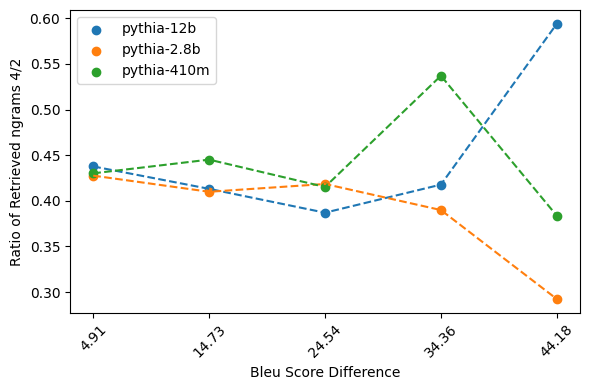

In [16]:
# Set the parameters
num_groups = 5
use_percentiles = False
use_log_scale = False

# Calculate the bin edges based on the selected method
if use_percentiles:
    percentiles = np.linspace(0, 100, num_groups + 1)
    bin_edges = [np.percentile(x_axis, p) for p in percentiles]
else:
    data_min = np.min(x_axis)
    data_max = np.max(x_axis)
    bin_edges = np.linspace(data_min, data_max, num_groups + 1)

# Calculate the ratios for each model
ratios = {}
for model in models:
    ratios[model] = compare_models(grouped_dfs[ngrams[0]][model], grouped_dfs[2][model], str(ngrams[0]), str(ngrams[1]))[y_metric]

# Group and average the data for each model
averages = {}
for model in models:
    averages[model] = group_and_average(ratios[model], bin_edges, x_axis)

# Calculate the midpoints of the bins
midpoints = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]

# Plot the averages
fig, ax = plt.subplots(figsize=(6, 4))
for model in models:
    ax.scatter(midpoints, averages[model].values, label=model)
    ax.plot(midpoints, averages[model].values, linestyle='--')

ax.set_ylabel('Ratio of Retrieved ngrams {}/{}'.format(ngrams[0], ngrams[1]))
ax.set_xlabel('Bleu Score Difference')
ax.set_xticks(midpoints)
ax.set_xticklabels([f'{mid:.2f}' for mid in midpoints], rotation=45)

if use_log_scale:
    ax.set_xscale('log')

ax.legend()
plt.tight_layout()
plt.show()

src unique: 90
src unique: 95
src unique: 57


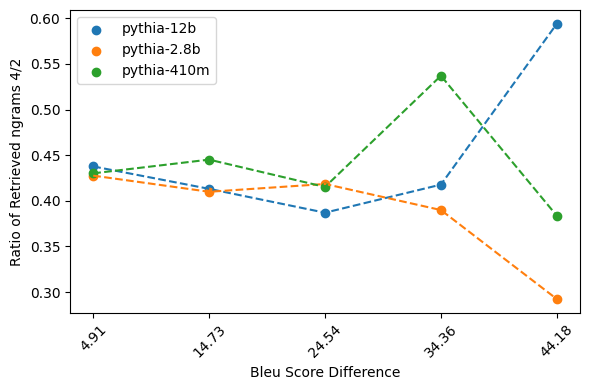

src unique: 90
src unique: 95
src unique: 57


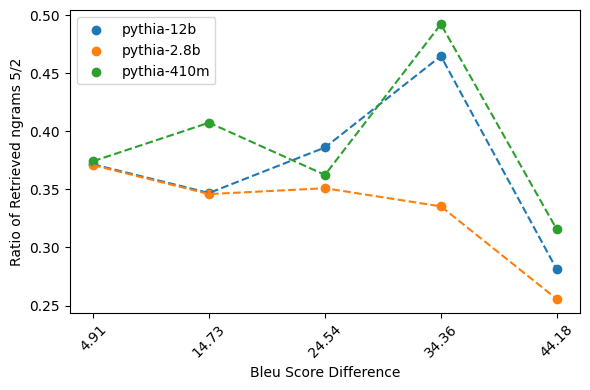

src unique: 90
src unique: 95
src unique: 56


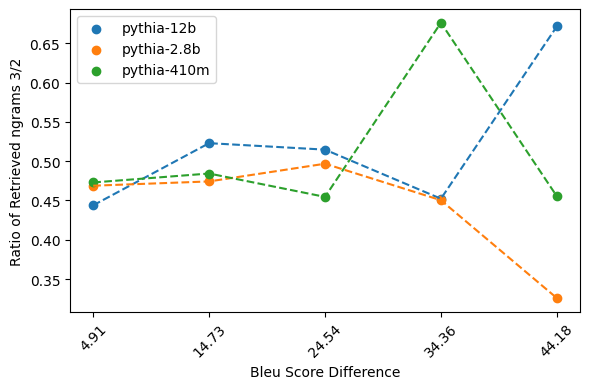

In [17]:
def plot_ngram_ratios(models, grouped_dfs, ngrams, y_metric, x_axis, num_groups=5, use_percentiles=False, use_log_scale=False):
    """
    Plot the ratio of retrieved ngrams for given models.
    
    Parameters:
        models (list): List of model names.
        grouped_dfs (dict): Dictionary of DataFrames grouped by ngram.
        ngrams (list): List containing two ngrams for comparison.
        y_metric (str): Metric to be used for comparison.
        x_axis (array-like): Array of values for the x-axis.
        num_groups (int): Number of groups for binning the x-axis.
        use_percentiles (bool): If True, use percentiles for binning. If False, use equal spacing.
        use_log_scale (bool): If True, use logarithmic scale for the x-axis.
    """
    
    # Calculate the bin edges based on the selected method
    if use_percentiles:
        percentiles = np.linspace(0, 100, num_groups + 1)
        bin_edges = [np.percentile(x_axis, p) for p in percentiles]
    else:
        data_min = np.min(x_axis)
        data_max = np.max(x_axis)
        bin_edges = np.linspace(data_min, data_max, num_groups + 1)
    
    # Calculate the ratios for each model
    ratios = {}
    for model in models:
        ratios[model] = compare_models(grouped_dfs[ngrams[0]][model], grouped_dfs[ngrams[1]][model], str(ngrams[0]), str(ngrams[1]))[y_metric]
    
    # Group and average the data for each model
    averages = {}
    for model in models:
        averages[model] = group_and_average(ratios[model], bin_edges, x_axis)
    
    # Calculate the midpoints of the bins
    midpoints = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]
    
    # Plot the averages
    fig, ax = plt.subplots(figsize=(6, 4))
    for model in models:
        ax.scatter(midpoints, averages[model].values, label=model)
        ax.plot(midpoints, averages[model].values, linestyle='--')
    
    ax.set_ylabel('Ratio of Retrieved ngrams {}/{}'.format(ngrams[0], ngrams[1]))
    ax.set_xlabel('Bleu Score Difference')
    ax.set_xticks(midpoints)
    ax.set_xticklabels([f'{mid:.2f}' for mid in midpoints], rotation=45)
    
    if use_log_scale:
        ax.set_xscale('log')
    
    ax.legend()
    plt.tight_layout()
    plt.show()


compare_ngram = 2

plot_ngram_ratios(models.copy(), grouped_dfs.copy(), [4, compare_ngram], 
                  'ratio_total', x_axis, 
                  num_groups=5, use_percentiles=False, 
                  use_log_scale=False)


plot_ngram_ratios(models.copy(), grouped_dfs.copy(), [5, compare_ngram], 
                  'ratio_total', x_axis, 
                  num_groups=5, use_percentiles=False, 
                  use_log_scale=False)

plot_ngram_ratios(models.copy(), grouped_dfs.copy(), [3, compare_ngram], 
                  'ratio_total', x_axis, 
                  num_groups=5, use_percentiles=False, 
                  use_log_scale=False)
# plot_ngram_ratios(models.copy(), grouped_dfs.copy(), [2, 1], 
#                   'ratio_total', x_axis, 
#                   num_groups=5, use_percentiles=False, 
#                   use_log_scale=False)

In [18]:
grouped_dfs[4]['pythia-12b'].head()

,src,value_sum,value_list,lang_1,lang_2,alignment_min,bleu_min,ref,result,n_pairs
0,"""And this is because it is not known through w...",5203,"[0, 0, 0, 115, 0, 1, 1, 0, 115, 0, 0, 0, 115, ...","[is because it is, mechanism and for what, mec...","[sabe por qué mecanismo, sabe por qué mecanism...",0.323624,42.728701,"""Y es por esto que no se sabe con qué mecanism...","""Y esto es porque no se sabe por qué mecanism...",252
1,"""More important is for the members of congress...",106293,"[0, 31, 0, 0, 0, 0, 31, 31, 31, 0, 31, 0, 0, 0...","[it as soon as, to support the plan, plan and ...","[acuerdo esta semana para, Cámara de Represent...",0.349626,11.992708,"""Mucho más importante es que, ya esta semana l...","""Es más importante que los miembros de la Cám...",441
2,"""We're on the edge of a definitive agreement o...",10983,"[27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[a definitive agreement on, which also must be...","[y que también debe, un plan que funcionará, f...",0.169871,27.748703,"""Estamos a punto de cerrar el convenio sobre e...","""Estamos a punto de alcanzar un acuerdo defin...",340
3,"""We've worked very hard on this and we've made...",2127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[and weve made great, this and weve made, and ...","[acuerdo que funcionará y, útil para todos los...",0.129066,21.539221,"""Hemos trabajado muy duramente en ello, y hemo...","""Hemos trabajado muy duro en esto y hemos hec...",456
4,A signal for Asian trading,0,"[0, 0, 0, 0]","[signal for Asian trading, A signal for Asian,...","[para el comercio asiático, Señal para el come...",0.711597,8.745825,Una señal para los negocios asiáticos,Señal para el comercio asiático,4


model: pythia-410m, ngram: 2, type: <class 'pandas.core.frame.DataFrame'> 
model: pythia-2.8b, ngram: 2, type: <class 'pandas.core.frame.DataFrame'> 
model: pythia-12b, ngram: 2, type: <class 'pandas.core.frame.DataFrame'> 
model: pythia-410m, ngram: 3, type: <class 'pandas.core.frame.DataFrame'> 
model: pythia-2.8b, ngram: 3, type: <class 'pandas.core.frame.DataFrame'> 
model: pythia-12b, ngram: 3, type: <class 'pandas.core.frame.DataFrame'> 
model: pythia-410m, ngram: 4, type: <class 'pandas.core.frame.DataFrame'> 
model: pythia-2.8b, ngram: 4, type: <class 'pandas.core.frame.DataFrame'> 
model: pythia-12b, ngram: 4, type: <class 'pandas.core.frame.DataFrame'> 
model: pythia-410m, ngram: 5, type: <class 'pandas.core.frame.DataFrame'> 
model: pythia-2.8b, ngram: 5, type: <class 'pandas.core.frame.DataFrame'> 
model: pythia-12b, ngram: 5, type: <class 'pandas.core.frame.DataFrame'> 
Ngrams sorted by type: [2, 3, 4, 5]
Processing ngram: 2, model: pythia-410m
Processing ngram: 3, model: 

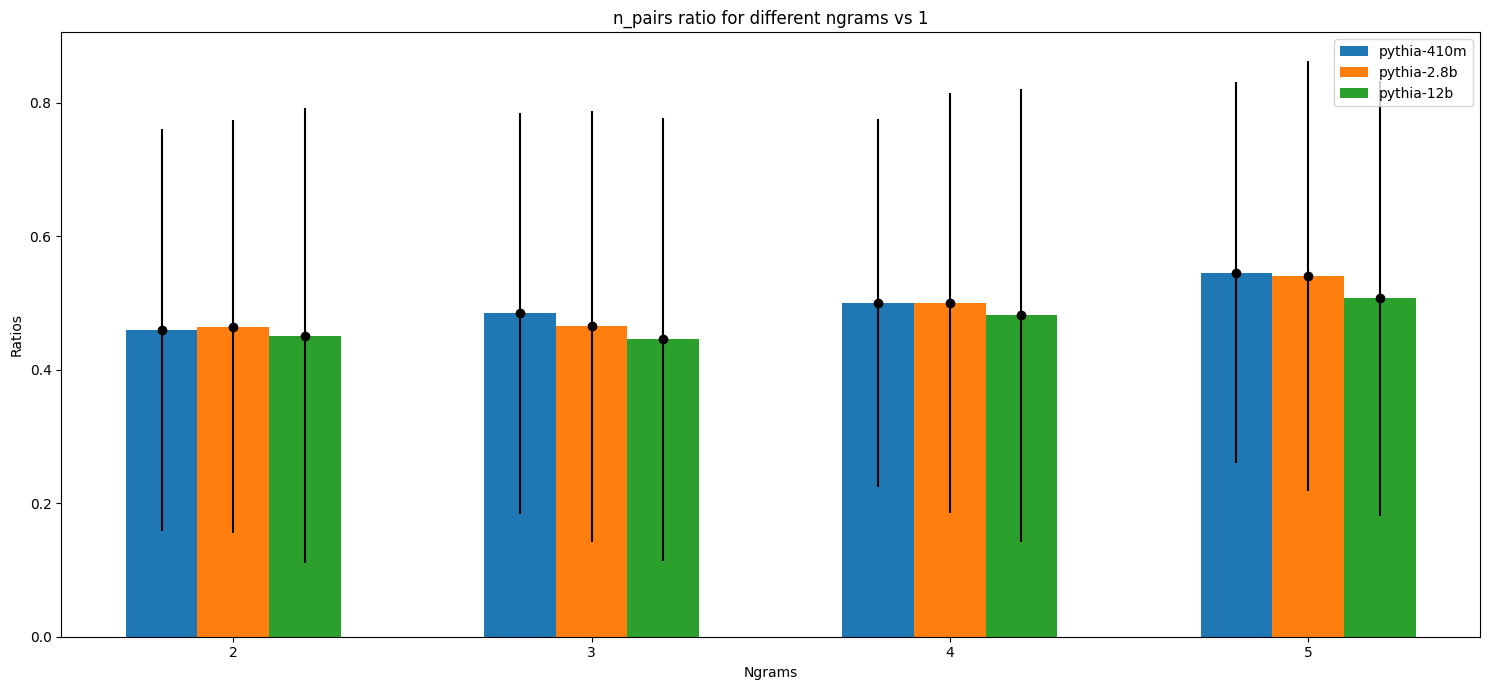

In [19]:
def plot_ratio_barchart(df):
    compare_ngram = 1
    variable = "n_pairs"
    
    # Calculate ratios and add them to the DataFrames
    for ngram in df.keys():
        if ngram == compare_ngram:
            continue
        
        for model in df[ngram].keys():
            print(f"model: {model}, ngram: {ngram}, type: {type(df[ngram][model])} ")
            
            n_pairs_total = df[compare_ngram][model][variable] + df[ngram][model][variable]
            df[ngram][model][f'{ngram}_ratio_{compare_ngram}'] = df[compare_ngram][model][variable] / n_pairs_total

    # Prepare the data for plotting
    models = list(df[compare_ngram].keys())
    ngrams = sorted([ngram for ngram in df.keys() if ngram != compare_ngram])
    
    print("Ngrams sorted by type:", ngrams)

    x = np.arange(len(ngrams))  # the label locations for ngrams
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 7))
    
    for idx, model in enumerate(models):
        ratios = []
        errors = []
        for ngram in ngrams:
            print(f"Processing ngram: {ngram}, model: {model}")
            ngram_model_ratio = df[ngram][model][f'{ngram}_ratio_{compare_ngram}'].mean()
            ngram_model_error = df[ngram][model][f'{ngram}_ratio_{compare_ngram}'].std()
            ratios.append(ngram_model_ratio)
            errors.append(ngram_model_error)
        
        x_offset = x + idx * width
        ax.bar(x_offset, ratios, width, label=f'{model}')
        ax.errorbar(x_offset, ratios, yerr=errors, fmt='o', color='black')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Ngrams')
    ax.set_ylabel('Ratios')
    ax.set_title(f'{variable} ratio for different ngrams vs {compare_ngram}')
    ax.set_xticks(x + width * (len(models) - 1) / 2)
    ax.set_xticklabels(ngrams)
    ax.legend()

    fig.tight_layout()
    plt.show()
plot_ratio_barchart(grouped_dfs)

src unique: 90
src unique: 95
src unique: 56
src unique: 90
src unique: 95
src unique: 56
src unique: 90
src unique: 95
src unique: 57
src unique: 90
src unique: 95
src unique: 57
src unique: 90
src unique: 95
src unique: 57
src unique: 90
src unique: 95
src unique: 57


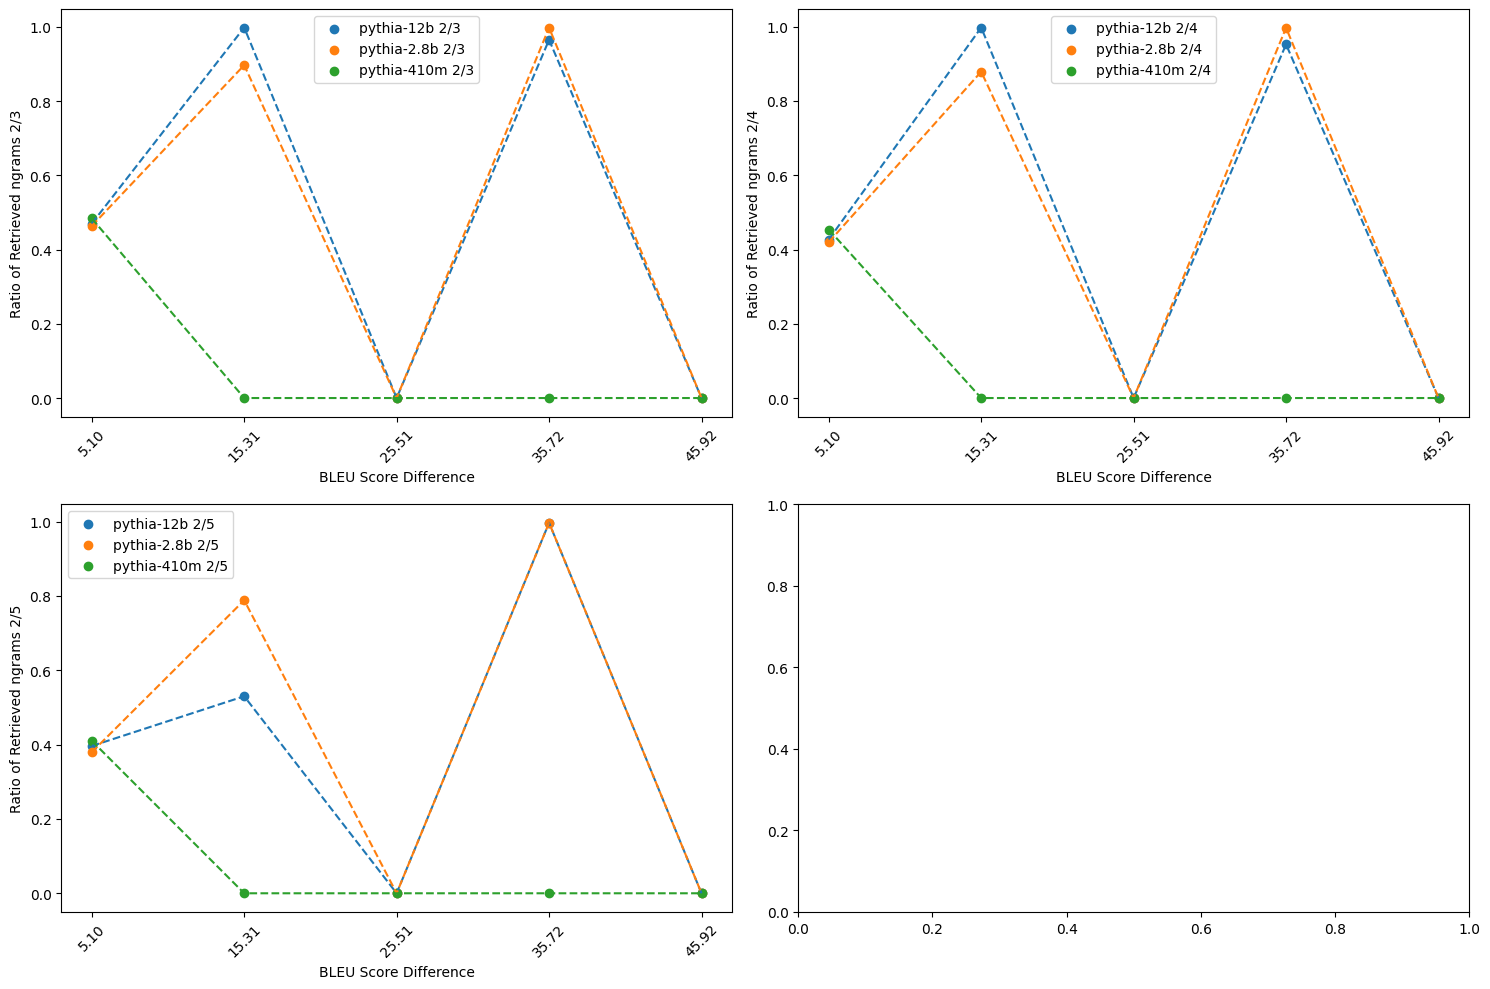

In [20]:
# Updated compare_models function
def compare_models(data_1, data_2, suffix_1, suffix_2):
    compared_df = data_1.merge(data_2, on='src', how='outer', suffixes=(f'_{suffix_1}', f'_{suffix_2}'))
    
    compared_df['bleu_min_{}'.format(suffix_1)] = compared_df['bleu_min_{}'.format(suffix_1)].fillna(0)
    compared_df['bleu_min_{}'.format(suffix_2)] = compared_df['bleu_min_{}'.format(suffix_2)].fillna(0)
    compared_df['n_pairs_{}'.format(suffix_1)] = compared_df['n_pairs_{}'.format(suffix_1)].fillna(0)
    compared_df['n_pairs_{}'.format(suffix_2)] = compared_df['n_pairs_{}'.format(suffix_2)].fillna(0)
    
    compared_df['blue_diff'] = np.abs(compared_df['bleu_min_{}'.format(suffix_1)] - compared_df['bleu_min_{}'.format(suffix_2)])
    compared_df['n_pairs_ratio'] = np.abs(compared_df['n_pairs_{}'.format(suffix_1)] / compared_df['n_pairs_{}'.format(suffix_2)])
    
    val_1 = np.abs(compared_df['n_pairs_{}'.format(suffix_1)])
    val_2 = np.abs(compared_df['n_pairs_{}'.format(suffix_2)])
    val_sum = val_1 + val_2
    compared_df['ratio_total'] = val_1 / val_sum
    
    print(f"src unique: {len(compared_df['src'].unique())}")
    
    return compared_df

def calculate_ratios(df, ngram1, ngram2, models, variable):
    for model in models:
        n_pairs_total = df[ngram1][model][variable] + df[ngram2][model][variable]
        df[ngram1][model][f'{ngram1}_ratio_{ngram2}'] = df[ngram2][model][variable] / n_pairs_total
        df[ngram2][model][f'{ngram2}_ratio_{ngram1}'] = df[ngram1][model][variable] / n_pairs_total

def group_and_average(ratios, bin_edges, x_axis):
    bin_indices = np.digitize(x_axis, bin_edges) - 1
    grouped = {i: [] for i in range(len(bin_edges) - 1)}
    
    for idx, value in enumerate(ratios):
        bin_idx = bin_indices[idx]
        if 0 <= bin_idx < len(bin_edges) - 1:
            grouped[bin_idx].append(value)
    
    averages = {i: np.mean(values) if values else 0 for i, values in grouped.items()}
    return averages

def plot_all_ratios(grouped_dfs, models, ref_ngram, compare_ngrams=None, x_metric='blue_diff', num_groups=5, use_percentiles=False, use_log_scale=False):
    if compare_ngrams is None:
        compare_ngrams = [ngram for ngram in grouped_dfs.keys() if ngram != ref_ngram]
    ngram_combinations = [(ref_ngram, ngram) for ngram in compare_ngrams]
    
    num_combinations = len(ngram_combinations)
    num_cols = 2
    num_rows = (num_combinations + 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    
    if num_rows == 1 and num_cols == 1:
        axes = np.array([[axes]])
    elif num_rows == 1:
        axes = np.array([axes])
    
    for idx, (ngram1, ngram2) in enumerate(ngram_combinations):
        row = idx // num_cols
        col = idx % num_cols
        ax = axes[row, col]
        
        calculate_ratios(grouped_dfs, ngram1, ngram2, models, "n_pairs")

        # Collect all BLEU score differences for combined binning
        all_bleu_scores = []
        for model in models:
            compared_df = compare_models(grouped_dfs[ngram1][model], grouped_dfs[ngram2][model], str(ngram1), str(ngram2))
            all_bleu_scores.extend(compared_df[x_metric])

        all_bleu_scores = np.array(all_bleu_scores)
        
        if use_percentiles:
            percentiles = np.linspace(0, 100, num_groups + 1)
            bin_edges = [np.percentile(all_bleu_scores, p) for p in percentiles]
        else:
            data_min = np.min(all_bleu_scores)
            data_max = np.max(all_bleu_scores)
            bin_edges = np.linspace(data_min, data_max, num_groups + 1)

        for model in models:
            compared_df = compare_models(grouped_dfs[ngram1][model], grouped_dfs[ngram2][model], str(ngram1), str(ngram2))
            bleu_scores = compared_df[x_metric]

            ratios = grouped_dfs[ngram1][model][f'{ngram1}_ratio_{ngram2}']
            averages = group_and_average(ratios, bin_edges, bleu_scores)
            midpoints = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]
            
            ax.scatter(midpoints, averages.values(), label=f'{model} {ngram1}/{ngram2}')
            ax.plot(midpoints, averages.values(), linestyle='--')
        
        ax.set_ylabel(f'Ratio of Retrieved ngrams {ngram1}/{ngram2}')
        ax.set_xlabel('BLEU Score Difference')
        ax.set_xticks(midpoints)
        ax.set_xticklabels([f'{mid:.2f}' for mid in midpoints], rotation=45)

        if use_log_scale:
            ax.set_xscale('log')

        ax.legend()
    
    plt.tight_layout()
    plt.show()
plot_all_ratios(grouped_dfs, models, 2, 
                compare_ngrams=[3, 4, 5], num_groups=5,
                x_metric='blue_diff',
                use_percentiles=False, use_log_scale=False)

In [21]:
pd.set_option('display.width', 20)
pd.set_option('display.max_colwidth', 1)
filtered_dfs[4]['pythia-12b'].head()

# value_row = 'value'
# groups = ['lang_1', 'lang_2']

,lang_1,lang_2,value,example,task,pair,example_clean,coverage,alignment_score,query,sum,count,id,gold,src,ref,result,bleu
17675,determines its currency policy,determina su política monetaria,0,"{'translation': {'en': 'Despite the fact that it is a part of China, Hong Kong determines its currency policy separately, that is, without being dependent on the Chinese Central Bank.', 'es': 'Aunque Hong Kong es una parte de China, ella sóla determina su política monetaria, es decir, sin dependencia del Banco Central de China.', 'gen': ' Aunque es parte de China, Hong Kong determina su política monetaria separadamente, es decir, sin depender del Banco Central de China.'}}",en-es,"(determines its currency policy, determina su política monetaria)","Despite the fact that it is a part of China, Hong Kong determines its currency policy separately, that is, without being dependent on the Chinese Central Bank.",0.35839,0.935634,"{'translation': {'en': 'Despite the fact that it is a part of China, Hong Kong determines its currency policy separately, that is, without being dependent on the Chinese Central Bank.', 'es': 'Aunque Hong Kong es una parte de China, ella sóla determina su política monetaria, es decir, sin dependencia del Banco Central de China.', 'gen': ' Aunque es parte de China, Hong Kong determina su política monetaria separadamente, es decir, sin depender del Banco Central de China.'}}",7915,168,2862_0,0,"Despite the fact that it is a part of China, Hong Kong determines its currency policy separately, that is, without being dependent on the Chinese Central Bank.","Aunque Hong Kong es una parte de China, ella sóla determina su política monetaria, es decir, sin dependencia del Banco Central de China.","Aunque es parte de China, Hong Kong determina su política monetaria separadamente, es decir, sin depender del Banco Central de China.",51.022958
17710,Hong Kong determines its,Hong Kong determina su,0,"{'translation': {'en': 'Despite the fact that it is a part of China, Hong Kong determines its currency policy separately, that is, without being dependent on the Chinese Central Bank.', 'es': 'Aunque Hong Kong es una parte de China, ella sóla determina su política monetaria, es decir, sin dependencia del Banco Central de China.', 'gen': ' Aunque es parte de China, Hong Kong determina su política monetaria separadamente, es decir, sin depender del Banco Central de China.'}}",en-es,"(Hong Kong determines its, Hong Kong determina su)","Despite the fact that it is a part of China, Hong Kong determines its currency policy separately, that is, without being dependent on the Chinese Central Bank.",0.35839,0.952279,"{'translation': {'en': 'Despite the fact that it is a part of China, Hong Kong determines its currency policy separately, that is, without being dependent on the Chinese Central Bank.', 'es': 'Aunque Hong Kong es una parte de China, ella sóla determina su política monetaria, es decir, sin dependencia del Banco Central de China.', 'gen': ' Aunque es parte de China, Hong Kong determina su política monetaria separadamente, es decir, sin depender del Banco Central de China.'}}",7915,168,2862_0,0,"Despite the fact that it is a part of China, Hong Kong determines its currency policy separately, that is, without being dependent on the Chinese Central Bank.","Aunque Hong Kong es una parte de China, ella sóla determina su política monetaria, es decir, sin dependencia del Banco Central de China.","Aunque es parte de China, Hong Kong determina su política monetaria separadamente, es decir, sin depender del Banco Central de China.",51.022958
883,block the release of,bloquear la liberación de,2,"{'translation': {'en': 'But Congress can block the release of the remaining amount, in the sequence of a further 100 billion dollars and later, the final 350 billion dollars, if it has the impression that the program is not fulfilling its function.', 'es': 'Sin embargo, el Congreso puede bloquear la liberación de la cantidad restante si tuviera la impres

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_2356023/6347188.py:48: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  ax = sns.barplot(x='ngram', y='zero_count', hue='model', data=zero_counts, palette=colors)
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


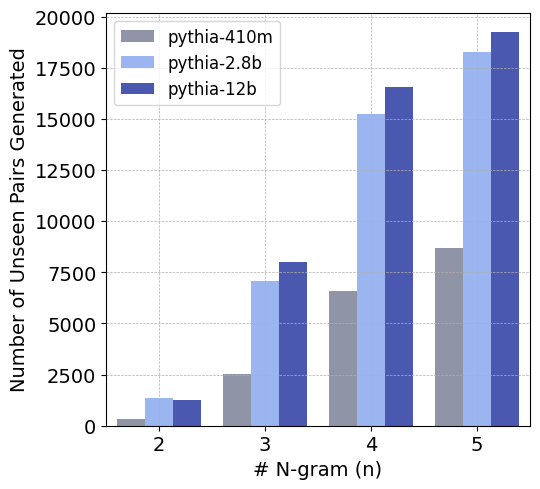

In [39]:
def plot_zero_values(filtered_dfs, ngram_col='value', models=None, ngrams=None, model_colors=None):
    """
    Plots the number of 0 values for each n-gram and model combination.

    Parameters:
        filtered_dfs (dict): A dictionary where keys are n-grams and values are dictionaries of models with their respective DataFrames.
        ngram_col (str): The column name that contains the n-gram values.
        models (list): A list of models to include in the plot.
        ngrams (list or range): A list or range of n-grams to include in the plot.
        model_colors (dict): A dictionary mapping models to colors.

    Returns:
        None
    """

    fontsize = 14
    # Create a list to store the counts of 0 values
    zero_counts_list = []

    for ngram, model_dict in filtered_dfs.items():
        if ngrams is not None and ngram not in ngrams:
            continue
        for model, df in model_dict.items():
            if models is not None and model not in models:
                continue
            zero_count = (df[ngram_col] == 0).sum()
            total_count = len((df[ngram_col]))
            # zero_count = zero_count / total_count
            zero_counts_list.append({'ngram': ngram, 'model': model, 'zero_count': zero_count})

    # Convert the list to a DataFrame
    zero_counts = pd.DataFrame(zero_counts_list)

    # Convert ngrams to a categorical type to ensure correct order in the plot
    zero_counts['ngram'] = pd.Categorical(zero_counts['ngram'], ordered=True)

    # Set up the color palette using the provided model_colors
    if model_colors is not None:
        unique_models = zero_counts['model'].unique()
        palette = [model_colors[model] for model in unique_models]
        model_to_color = dict(zip(unique_models, palette))
        colors = [model_to_color[model] for model in zero_counts['model']]
    else:
        colors = sns.color_palette("husl", zero_counts['model'].nunique())
    
    # Create the bar plot
    plt.figure(figsize=(5.5, 5))
    ax = sns.barplot(x='ngram', y='zero_count', hue='model', data=zero_counts, palette=colors)

    # Customize the plot
    plt.xlabel('# N-gram (n)', fontsize=fontsize)
    plt.ylabel('Number of Unseen Pairs Generated', fontsize=fontsize)
    # plt.title('Comparison of Never Before Seen Generated (X, Y) Pairs (English-Spanish)', fontsize=14, pad=20)
    plt.legend(title_fontsize='13', fontsize='12', loc='upper left')
    plt.xticks(rotation=0, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    # Round the bars and remove black outlines
    for patch in ax.patches:
        patch.set_edgecolor('none')
        # Round the corners
        patch.set_path_effects([path_effects.withStroke(linewidth=0, foreground=patch.get_facecolor())])
        patch.set_linewidth(0)

    plt.savefig("./figures/translation/dist/wmt09gens/zero_values.pdf")
    # Show the plot
    plt.show()

# Example usage
plot_zero_values(dfs, ngrams=range(2, 6), model_colors=model_color_mapping)